In [1]:
# non-stratified sample QC
# run on autosomes only, non-LD pruned data

import hail as hl
import pyspark
from hail.plot import show
hl.plot.output_notebook()

from bokeh.plotting import output_file, save

sc = pyspark.SparkContext()
tmp_dir = "hdfs://spark-master:9820/"
lustre_dir = "file:///lustre/scratch123/qc/"
hl.init(sc=sc, tmp_dir=tmp_dir, default_reference="GRCh38")

Loading BokehJS ...

2022-03-30 08:02:14 WARN  NativeCodeLoader:60 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
pip-installed Hail requires additional configuration options in Spark referring
  to the path to the Hail Python module directory HAIL_DIR,
  e.g. /path/to/python/site-packages/hail:
    spark.jars=HAIL_DIR/backend/hail-all-spark.jar
    spark.driver.extraClassPath=HAIL_DIR/backend/hail-all-spark.jar
    spark.executor.extraClassPath=./hail-all-spark.jarRunning on Apache Spark version 3.1.2
SparkUI available at http://spark-master:4040
Welcome to
     __  __     <>__
    / /_/ /__  __/ /
   / __  / _ `/ / /
  /_/ /_/\_,_/_/_/   version 0.2.88-7d39379870da
LOGGING: writing to /home/ubuntu/jupyter/hail-20220330-0802-0.2.88-7d39379870da.log


In [2]:
ht_sample_qc_file = lustre_dir + "matrixtables/non_stratified_sample_qc_cols.ht"
ht = hl.read_table(ht_sample_qc_file)
ht.show()

+-------------------+----------+---------------------+--------------+
| s                 | batch    | sequencing_location | assigned_pop |
+-------------------+----------+---------------------+--------------+
| str               | str      | str                 | str          |
+-------------------+----------+---------------------+--------------+
| "EGAN00003143328" | "batch1" | "Sanger"            | "EUR"        |
| "EGAN00003143329" | "batch1" | "Sanger"            | "EUR"        |
| "EGAN00003143330" | "batch1" | "Sanger"            | "AFR"        |
| "EGAN00003143331" | "batch1" | "Sanger"            | "EUR"        |
| "EGAN00003143334" | "batch1" | "Sanger"            | "EUR"        |
| "EGAN00003143336" | "batch1" | "Sanger"            | "EUR"        |
| "EGAN00003143337" | "batch1" | "Sanger"            | "EUR"        |
| "EGAN00003143338" | "batch1" | "Sanger"            | "EUR"        |
| "EGAN00003143339" | "batch1" | "Sanger"            | "EUR"        |
| "EGAN00003143340" | "batch1" | "Sanger"            | "EUR"        |
+-------------------+----------+---------------------+--------------+

+-------------------------+--------------------------+------------------------+
| sample_qc.dp_stats.mean | sample_qc.dp_stats.stdev | sample_qc.dp_stats.min |
+-------------------------+--------------------------+------------------------+
|                 float64 |                  float64 |                float64 |
+-------------------------+--------------------------+------------------------+
|                2.73e+01 |                 1.66e+01 |               0.00e+00 |
|                2.48e+01 |                 1.49e+01 |               0.00e+00 |
|                2.61e+01 |                 1.51e+01 |               0.00e+00 |
|                2.59e+01 |                 1.60e+01 |               0.00e+00 |
|                2.56e+01 |                 1.47e+01 |               0.00e+00 |
|                2.64e+01 |                 1.56e+01 |               0.00e+00 |
|                2.86e+01 |                 1.76e+01 |               0.00e+00 |
|                2.54e+01 |                 1.53e+01 |               0.00e+00 |
|                2.69e+01 |                 1.57e+01 |               0.00e+00 |
|                2.65e+01 |                 1.54e+01 |               0.00e+00 |
+-------------------------+--------------------------+------------------------+

+------------------------+-------------------------+--------------------------+
| sample_qc.dp_stats.max | sample_qc.gq_stats.mean | sample_qc.gq_stats.stdev |
+------------------------+-------------------------+--------------------------+
|                float64 |                 float64 |                  float64 |
+------------------------+-------------------------+--------------------------+
|               1.35e+03 |                6.49e+01 |                 3.05e+01 |
|               1.07e+03 |                5.99e+01 |                 3.12e+01 |
|               1.45e+03 |                6.26e+01 |                 3.07e+01 |
|               1.01e+03 |                6.20e+01 |                 3.13e+01 |
|               1.01e+03 |                6.18e+01 |                 3.07e+01 |
|               1.03e+03 |                6.31e+01 |                 3.06e+01 |
|               1.55e+03 |                6.77e+01 |                 2.96e+01 |
|               1.12e+03 |                6.13e+01 |                 3.09e+01 |
|               1.17e+03 |                6.43e+01 |                 3.05e+01 |
|               1.32e+03 |                6.35e+01 |                 3.05e+01 |
+------------------------+-------------------------+--------------------------+

+------------------------+------------------------+---------------------+
| sample_qc.gq_stats.min | sample_qc.gq_stats.max | sample_qc.call_rate |
+------------------------+------------------------+---------------------+
|                float64 |                float64 |             float64 |
+--------------------

In [3]:
#create subset for each assigned pop, and convert each to a pandas dataframe
AFRht = ht.filter(ht.assigned_pop == 'AFR')
AMRht = ht.filter(ht.assigned_pop == 'AMR')
EURht = ht.filter(ht.assigned_pop == 'EUR')
EASht = ht.filter(ht.assigned_pop == 'EAS')
SASht = ht.filter(ht.assigned_pop == 'SAS')
othht = ht.filter(ht.assigned_pop == 'oth')

AFR_df = AFRht.to_pandas(flatten=True)
AMR_df = AMRht.to_pandas(flatten=True)
EUR_df = EURht.to_pandas(flatten=True)
EAS_df = EASht.to_pandas(flatten=True)
SAS_df = SASht.to_pandas(flatten=True)
oth_df = othht.to_pandas(flatten=True)
all_df = ht.to_pandas(flatten=True)

In [4]:
#create subset for each batch and convery to pandas dataframe
b1ht = ht.filter(ht.batch == 'batch1')
b2ht = ht.filter(ht.batch == 'batch2')
b3ht = ht.filter(ht.batch == 'batch3')
b4ht = ht.filter(ht.batch == 'batch4')
b5ht = ht.filter(ht.batch == 'batch5')
b6ht = ht.filter(ht.batch == 'batch6')
nobatchht = ht.filter(hl.is_defined(ht.batch), keep=False)

b1_df = b1ht.to_pandas(flatten=True)
b2_df = b2ht.to_pandas(flatten=True)
b3_df = b3ht.to_pandas(flatten=True)
b4_df = b4ht.to_pandas(flatten=True)
b5_df = b5ht.to_pandas(flatten=True)
b6_df = b6ht.to_pandas(flatten=True)
nobatch_df = nobatchht.to_pandas(flatten=True)

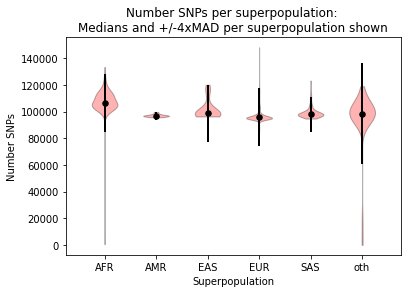

In [5]:
import numpy as np
import matplotlib.pyplot as plt

plot_dir = "/lustre/scratch123/qc/plots/sample_qc/"

def set_axis_style(ax, labels):
    ax.xaxis.set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1), labels=labels)
    ax.set_xlim(0.25, len(labels) + 0.75)
    ax.set_xlabel('Superpopulation')
    
#plots for nSNPs and pop
metric = 'sample_qc.n_snp'
m1 = AFR_df[metric].median()
m2 = AMR_df[metric].median()
m3 = EAS_df[metric].median()
m4 = EUR_df[metric].median()
m5 = SAS_df[metric].median()
m6 = oth_df[metric].median()
meds = np.array([m1, m2, m3, m4, m5, m6])
q1 = np.array([m1-(4*AFR_df.mad()[metric]), m2-(4*AMR_df.mad()[metric]), m3-(4*EAS_df.mad()[metric]), m4-(4*EAS_df.mad()[metric]), m5-(4*EUR_df.mad()[metric]), m6-(4*oth_df.mad()[metric])])
q2 = np.array([m1+(4*AFR_df.mad()[metric]), m2+(4*AMR_df.mad()[metric]), m3+(4*EAS_df.mad()[metric]), m4+(4*EAS_df.mad()[metric]), m5+(4*EUR_df.mad()[metric]), m6+(4*oth_df.mad()[metric])])

fig, ax = plt.subplots()
ax.set_title('Number SNPs per superpopulation: \nMedians and +/-4xMAD per superpopulation shown')
ax.set_ylabel('Number SNPs')

violin_parts = ax.violinplot([AFR_df[metric], AMR_df[metric], EAS_df[metric], EUR_df[metric], SAS_df[metric], oth_df[metric]], showmeans=False, showmedians=False, showextrema=False)

for pc in violin_parts['bodies']:
    pc.set_facecolor('red')
    pc.set_edgecolor('black')
    
inds = np.arange(1, len(meds) + 1)
ax.scatter(inds, meds, marker='o', color='black', s=30, zorder=3)
ax.vlines(inds, q1, q2, color='k', linestyle='-', lw=2)
labels = ['AFR', 'AMR', 'EAS', 'EUR', 'SAS', 'oth']
set_axis_style(ax, labels)

#plt.show()
plotfile = plot_dir + 'nSNP_violin_with_4MAD_pops_all_sites.png'
plt.savefig(plotfile, dpi=100)

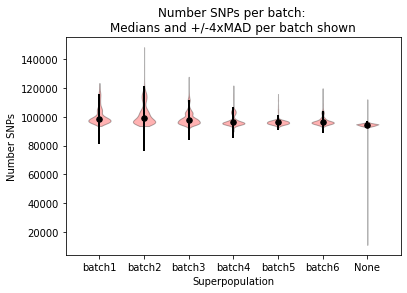

In [6]:
#plots for nSNPs and batch
metric = 'sample_qc.n_snp'
m1 = b1_df[metric].median()
m2 = b2_df[metric].median()
m3 = b3_df[metric].median()
m4 = b4_df[metric].median()
m5 = b5_df[metric].median()
m6 = b6_df[metric].median()
m7 = nobatch_df[metric].median()
meds = np.array([m1, m2, m3, m4, m5, m6, m7])
q1 = np.array([m1-(4*b1_df.mad()[metric]), m2-(4*b2_df.mad()[metric]), m3-(4*b3_df.mad()[metric]), m4-(4*b4_df.mad()[metric]), m5-(4*b5_df.mad()[metric]), m6-(4*b6_df.mad()[metric]), m7-(4*nobatch_df.mad()[metric])])
q2 = np.array([m1+(4*b1_df.mad()[metric]), m2+(4*b2_df.mad()[metric]), m3+(4*b3_df.mad()[metric]), m4+(4*b4_df.mad()[metric]), m5+(4*b5_df.mad()[metric]), m6+(4*b6_df.mad()[metric]), m7+(4*nobatch_df.mad()[metric])])

fig, ax = plt.subplots()
ax.set_title('Number SNPs per batch: \nMedians and +/-4xMAD per batch shown')
ax.set_ylabel('Number SNPs')

violin_parts = ax.violinplot([b1_df[metric], b2_df[metric], b3_df[metric], b4_df[metric], b5_df[metric], b6_df[metric], nobatch_df[metric]], showmeans=False, showmedians=False, showextrema=False)

for pc in violin_parts['bodies']:
    pc.set_facecolor('red')
    pc.set_edgecolor('black')
    
inds = np.arange(1, len(meds) + 1)
ax.scatter(inds, meds, marker='o', color='black', s=30, zorder=3)
ax.vlines(inds, q1, q2, color='k', linestyle='-', lw=2)
labels = ['batch1', 'batch2', 'batch3', 'batch4', 'batch5', 'batch6', 'None']
set_axis_style(ax, labels)

#plt.show()
plotfile = plot_dir + 'nSNP_violin_with_4MAD_batch_all_sites.png'
plt.savefig(plotfile, dpi=100)

/home/ubuntu/venv/lib/python3.8/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


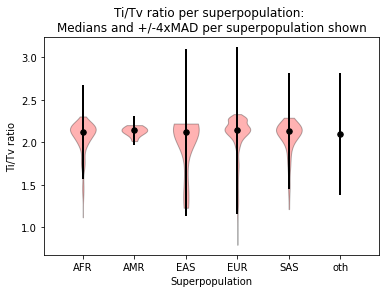

In [7]:
#plots for rTiTv and pop
metric = 'sample_qc.r_ti_tv'
m1 = AFR_df[metric].median()
m2 = AMR_df[metric].median()
m3 = EAS_df[metric].median()
m4 = EUR_df[metric].median()
m5 = SAS_df[metric].median()
m6 = oth_df[metric].median()
meds = np.array([m1, m2, m3, m4, m5, m6])
q1 = np.array([m1-(4*AFR_df.mad()[metric]), m2-(4*AMR_df.mad()[metric]), m3-(4*EAS_df.mad()[metric]), m4-(4*EAS_df.mad()[metric]), m5-(4*EUR_df.mad()[metric]), m6-(4*oth_df.mad()[metric])])
q2 = np.array([m1+(4*AFR_df.mad()[metric]), m2+(4*AMR_df.mad()[metric]), m3+(4*EAS_df.mad()[metric]), m4+(4*EAS_df.mad()[metric]), m5+(4*EUR_df.mad()[metric]), m6+(4*oth_df.mad()[metric])])

fig, ax = plt.subplots()
ax.set_title('Ti/Tv ratio per superpopulation: \nMedians and +/-4xMAD per superpopulation shown')
ax.set_ylabel('Ti/Tv ratio')

violin_parts = ax.violinplot([AFR_df[metric], AMR_df[metric], EAS_df[metric], EUR_df[metric], SAS_df[metric], oth_df[metric]], showmeans=False, showmedians=False, showextrema=False)

for pc in violin_parts['bodies']:
    pc.set_facecolor('red')
    pc.set_edgecolor('black')
    
inds = np.arange(1, len(meds) + 1)
ax.scatter(inds, meds, marker='o', color='black', s=30, zorder=3)
ax.vlines(inds, q1, q2, color='k', linestyle='-', lw=2)
labels = ['AFR', 'AMR', 'EAS', 'EUR', 'SAS', 'oth']
set_axis_style(ax, labels)

#plt.show()
plotfile = plot_dir + 'rTiTv_violin_with_4MAD_pops_all_sites.png'
plt.savefig(plotfile, dpi=100)

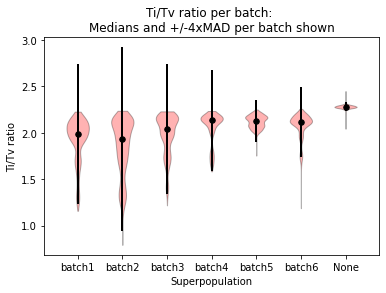

In [8]:
#plots for rTiTv and batch
metric = 'sample_qc.r_ti_tv'
m1 = b1_df[metric].median()
m2 = b2_df[metric].median()
m3 = b3_df[metric].median()
m4 = b4_df[metric].median()
m5 = b5_df[metric].median()
m6 = b6_df[metric].median()
m7 = nobatch_df[metric].median()
meds = np.array([m1, m2, m3, m4, m5, m6, m7])
q1 = np.array([m1-(4*b1_df.mad()[metric]), m2-(4*b2_df.mad()[metric]), m3-(4*b3_df.mad()[metric]), m4-(4*b4_df.mad()[metric]), m5-(4*b5_df.mad()[metric]), m6-(4*b6_df.mad()[metric]), m7-(4*nobatch_df.mad()[metric])])
q2 = np.array([m1+(4*b1_df.mad()[metric]), m2+(4*b2_df.mad()[metric]), m3+(4*b3_df.mad()[metric]), m4+(4*b4_df.mad()[metric]), m5+(4*b5_df.mad()[metric]), m6+(4*b6_df.mad()[metric]), m7+(4*nobatch_df.mad()[metric])])

fig, ax = plt.subplots()
ax.set_title('Ti/Tv ratio per batch: \nMedians and +/-4xMAD per batch shown')
ax.set_ylabel('Ti/Tv ratio')

violin_parts = ax.violinplot([b1_df[metric], b2_df[metric], b3_df[metric], b4_df[metric], b5_df[metric], b6_df[metric], nobatch_df[metric]], showmeans=False, showmedians=False, showextrema=False)

for pc in violin_parts['bodies']:
    pc.set_facecolor('red')
    pc.set_edgecolor('black')
    
inds = np.arange(1, len(meds) + 1)
ax.scatter(inds, meds, marker='o', color='black', s=30, zorder=3)
ax.vlines(inds, q1, q2, color='k', linestyle='-', lw=2)
labels = ['batch1', 'batch2', 'batch3', 'batch4', 'batch5', 'batch6', 'None']
set_axis_style(ax, labels)

#plt.show()
plotfile = plot_dir + 'rTiTv_violin_with_4MAD_batch_all_sites.png'
plt.savefig(plotfile, dpi=100)

/home/ubuntu/venv/lib/python3.8/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


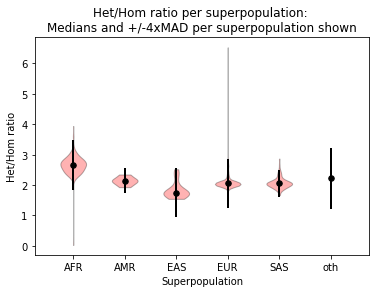

In [9]:
#plots for rHetHom and pop
metric = 'sample_qc.r_het_hom_var'
m1 = AFR_df[metric].median()
m2 = AMR_df[metric].median()
m3 = EAS_df[metric].median()
m4 = EUR_df[metric].median()
m5 = SAS_df[metric].median()
m6 = oth_df[metric].median()
meds = np.array([m1, m2, m3, m4, m5, m6])
q1 = np.array([m1-(4*AFR_df.mad()[metric]), m2-(4*AMR_df.mad()[metric]), m3-(4*EAS_df.mad()[metric]), m4-(4*EAS_df.mad()[metric]), m5-(4*EUR_df.mad()[metric]), m6-(4*oth_df.mad()[metric])])
q2 = np.array([m1+(4*AFR_df.mad()[metric]), m2+(4*AMR_df.mad()[metric]), m3+(4*EAS_df.mad()[metric]), m4+(4*EAS_df.mad()[metric]), m5+(4*EUR_df.mad()[metric]), m6+(4*oth_df.mad()[metric])])

fig, ax = plt.subplots()
ax.set_title('Het/Hom ratio per superpopulation: \nMedians and +/-4xMAD per superpopulation shown')
ax.set_ylabel('Het/Hom ratio')

violin_parts = ax.violinplot([AFR_df[metric], AMR_df[metric], EAS_df[metric], EUR_df[metric], SAS_df[metric], oth_df[metric]], showmeans=False, showmedians=False, showextrema=False)

for pc in violin_parts['bodies']:
    pc.set_facecolor('red')
    pc.set_edgecolor('black')
    
inds = np.arange(1, len(meds) + 1)
ax.scatter(inds, meds, marker='o', color='black', s=30, zorder=3)
ax.vlines(inds, q1, q2, color='k', linestyle='-', lw=2)
labels = ['AFR', 'AMR', 'EAS', 'EUR', 'SAS', 'oth']
set_axis_style(ax, labels)

#plt.show()
plotfile = plot_dir + 'rHetHom_violin_with_4MAD_pops_all_sites.png'
plt.savefig(plotfile, dpi=100)

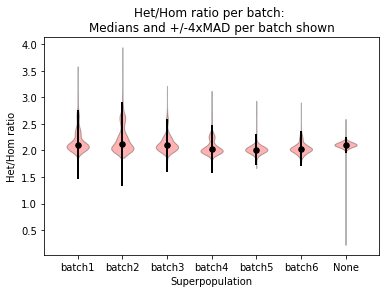

In [10]:
#plots for rHetHom and batch
metric = 'sample_qc.r_het_hom_var'
m1 = b1_df[metric].median()
m2 = b2_df[metric].median()
m3 = b3_df[metric].median()
m4 = b4_df[metric].median()
m5 = b5_df[metric].median()
m6 = b6_df[metric].median()
m7 = nobatch_df[metric].median()
meds = np.array([m1, m2, m3, m4, m5, m6, m7])
q1 = np.array([m1-(4*b1_df.mad()[metric]), m2-(4*b2_df.mad()[metric]), m3-(4*b3_df.mad()[metric]), m4-(4*b4_df.mad()[metric]), m5-(4*b5_df.mad()[metric]), m6-(4*b6_df.mad()[metric]), m7-(4*nobatch_df.mad()[metric])])
q2 = np.array([m1+(4*b1_df.mad()[metric]), m2+(4*b2_df.mad()[metric]), m3+(4*b3_df.mad()[metric]), m4+(4*b4_df.mad()[metric]), m5+(4*b5_df.mad()[metric]), m6+(4*b6_df.mad()[metric]), m7+(4*nobatch_df.mad()[metric])])

fig, ax = plt.subplots()
ax.set_title('Het/Hom ratio per batch: \nMedians and +/-4xMAD per batch shown')
ax.set_ylabel('Het/Hom ratio')

violin_parts = ax.violinplot([b1_df[metric], b2_df[metric], b3_df[metric], b4_df[metric], b5_df[metric], b6_df[metric], nobatch_df[metric]], showmeans=False, showmedians=False, showextrema=False)

for pc in violin_parts['bodies']:
    pc.set_facecolor('red')
    pc.set_edgecolor('black')
    
inds = np.arange(1, len(meds) + 1)
ax.scatter(inds, meds, marker='o', color='black', s=30, zorder=3)
ax.vlines(inds, q1, q2, color='k', linestyle='-', lw=2)
labels = ['batch1', 'batch2', 'batch3', 'batch4', 'batch5', 'batch6', 'None']
set_axis_style(ax, labels)

#plt.show()
plotfile = plot_dir + 'rHetHom_violin_with_4MAD_batch_all_sites.png'
plt.savefig(plotfile, dpi=100)

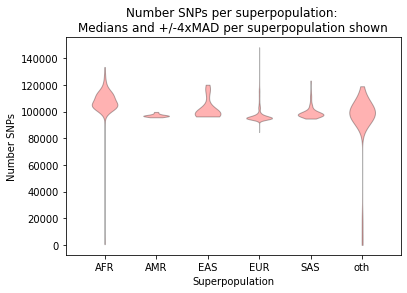

In [20]:
#violin plots without MAD annotation
#plots for nSNPs and pop
metric = 'sample_qc.n_snp'

fig, ax = plt.subplots()
ax.set_title('Number SNPs per superpopulation: \nMedians and +/-4xMAD per superpopulation shown')
ax.set_ylabel('Number SNPs')

violin_parts = ax.violinplot([AFR_df[metric], AMR_df[metric], EAS_df[metric], EUR_df[metric], SAS_df[metric], oth_df[metric]], showmeans=False, showmedians=False, showextrema=False)

for pc in violin_parts['bodies']:
    pc.set_facecolor('red')
    pc.set_edgecolor('black')
    
labels = ['AFR', 'AMR', 'EAS', 'EUR', 'SAS', 'oth']
set_axis_style(ax, labels)

#plt.show()
plotfile = plot_dir + 'nSNP_violin_pops_all_sites.png'
plt.savefig(plotfile, dpi=100)

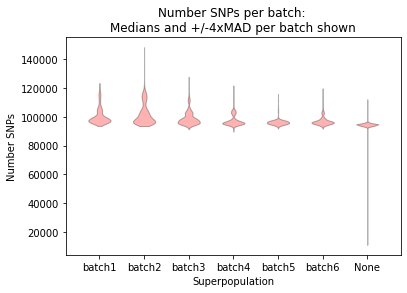

In [11]:
#plots for nSNPs and batch
metric = 'sample_qc.n_snp'

fig, ax = plt.subplots()
ax.set_title('Number SNPs per batch: \nMedians and +/-4xMAD per batch shown')
ax.set_ylabel('Number SNPs')

violin_parts = ax.violinplot([b1_df[metric], b2_df[metric], b3_df[metric], b4_df[metric], b5_df[metric], b6_df[metric], nobatch_df[metric]], showmeans=False, showmedians=False, showextrema=False)

for pc in violin_parts['bodies']:
    pc.set_facecolor('red')
    pc.set_edgecolor('black')
    
labels = ['batch1', 'batch2', 'batch3', 'batch4', 'batch5', 'batch6', 'None']
set_axis_style(ax, labels)

#plt.show()
plotfile = plot_dir + 'nSNP_violin_batch_all_sites.png'
plt.savefig(plotfile, dpi=100)

/home/ubuntu/venv/lib/python3.8/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


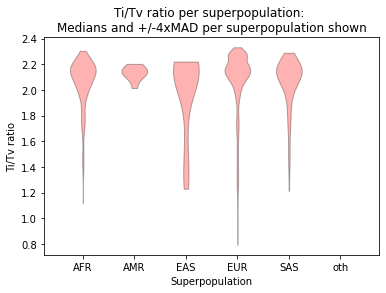

In [12]:
#plots for rTiTv and pop
metric = 'sample_qc.r_ti_tv'

fig, ax = plt.subplots()
ax.set_title('Ti/Tv ratio per superpopulation: \nMedians and +/-4xMAD per superpopulation shown')
ax.set_ylabel('Ti/Tv ratio')

violin_parts = ax.violinplot([AFR_df[metric], AMR_df[metric], EAS_df[metric], EUR_df[metric], SAS_df[metric], oth_df[metric]], showmeans=False, showmedians=False, showextrema=False)

for pc in violin_parts['bodies']:
    pc.set_facecolor('red')
    pc.set_edgecolor('black')
    
labels = ['AFR', 'AMR', 'EAS', 'EUR', 'SAS', 'oth']
set_axis_style(ax, labels)

#plt.show()
plotfile = plot_dir + 'rTiTv_violin_pops_all_sites.png'
plt.savefig(plotfile, dpi=100)

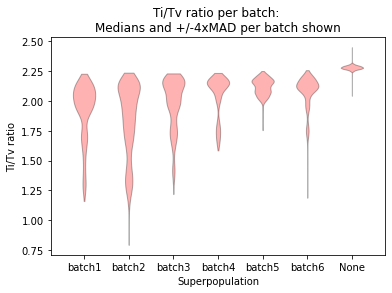

In [13]:
#plots for rTiTv and batch
metric = 'sample_qc.r_ti_tv'

fig, ax = plt.subplots()
ax.set_title('Ti/Tv ratio per batch: \nMedians and +/-4xMAD per batch shown')
ax.set_ylabel('Ti/Tv ratio')

violin_parts = ax.violinplot([b1_df[metric], b2_df[metric], b3_df[metric], b4_df[metric], b5_df[metric], b6_df[metric], nobatch_df[metric]], showmeans=False, showmedians=False, showextrema=False)

for pc in violin_parts['bodies']:
    pc.set_facecolor('red')
    pc.set_edgecolor('black')
    
labels = ['batch1', 'batch2', 'batch3', 'batch4', 'batch5', 'batch6', 'None']
set_axis_style(ax, labels)

#plt.show()
plotfile = plot_dir + 'rTiTv_violin_batch_all_sites.png'
plt.savefig(plotfile, dpi=100)

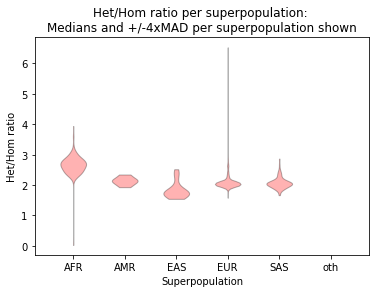

In [14]:
#plots for rHetHom and pop
metric = 'sample_qc.r_het_hom_var'

fig, ax = plt.subplots()
ax.set_title('Het/Hom ratio per superpopulation: \nMedians and +/-4xMAD per superpopulation shown')
ax.set_ylabel('Het/Hom ratio')

violin_parts = ax.violinplot([AFR_df[metric], AMR_df[metric], EAS_df[metric], EUR_df[metric], SAS_df[metric], oth_df[metric]], showmeans=False, showmedians=False, showextrema=False)

for pc in violin_parts['bodies']:
    pc.set_facecolor('red')
    pc.set_edgecolor('black')
    

labels = ['AFR', 'AMR', 'EAS', 'EUR', 'SAS', 'oth']
set_axis_style(ax, labels)

#plt.show()
plotfile = plot_dir + 'rHetHom_violin_pops_all_sites.png'
plt.savefig(plotfile, dpi=100)

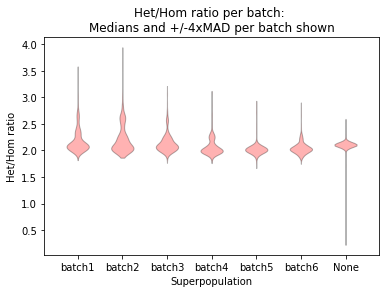

In [15]:
#plots for rHetHom and batch
metric = 'sample_qc.r_het_hom_var'

fig, ax = plt.subplots()
ax.set_title('Het/Hom ratio per batch: \nMedians and +/-4xMAD per batch shown')
ax.set_ylabel('Het/Hom ratio')

violin_parts = ax.violinplot([b1_df[metric], b2_df[metric], b3_df[metric], b4_df[metric], b5_df[metric], b6_df[metric], nobatch_df[metric]], showmeans=False, showmedians=False, showextrema=False)

for pc in violin_parts['bodies']:
    pc.set_facecolor('red')
    pc.set_edgecolor('black')
    
labels = ['batch1', 'batch2', 'batch3', 'batch4', 'batch5', 'batch6', 'None']
set_axis_style(ax, labels)

#plt.show()
plotfile = plot_dir + 'rHetHom_violin_batch_all_sites.png'
plt.savefig(plotfile, dpi=100)

In [16]:
#scatter plots, nSNP, rTiTv, rHetHom coloured by batch
tmp_file = "/lustre/scratch123/qc//plots/sample_qc/tmp.html"#temp file for plots
import os

p = hl.plot.scatter(ht.sample_qc.n_snp, ht.sample_qc.r_ti_tv, xlabel='nSNP', ylabel='Ti/Tv ratio', label=ht.batch, collect_all = True)
plot_file = "/lustre/scratch123/qc//plots/sample_qc/nsnp_titv_not_strat.html"
output_file(tmp_file)
save(p)
os.rename(tmp_file, plot_file)

In [17]:
p = hl.plot.scatter(ht.sample_qc.n_snp, ht.sample_qc.r_het_hom_var, xlabel='nSNP', ylabel='Het/Hom ratio', label=ht.batch, collect_all = True)
plot_file = "/lustre/scratch123/qc/plots/sample_qc/nsnp_rhethom_not_strat.html"
output_file(tmp_file)
save(p)
os.rename(tmp_file, plot_file)

In [19]:
p = hl.plot.scatter(ht.sample_qc.r_ti_tv, ht.sample_qc.r_het_hom_var, xlabel='Ti/Tv ratio', ylabel='Het/Hom ratio', label=ht.batch, collect_all = True)
plot_file = "/lustre/scratch123/qc/plots/sample_qc/titv_rhethom_not_strat.html"
output_file(tmp_file)
save(p)
os.rename(tmp_file, plot_file)